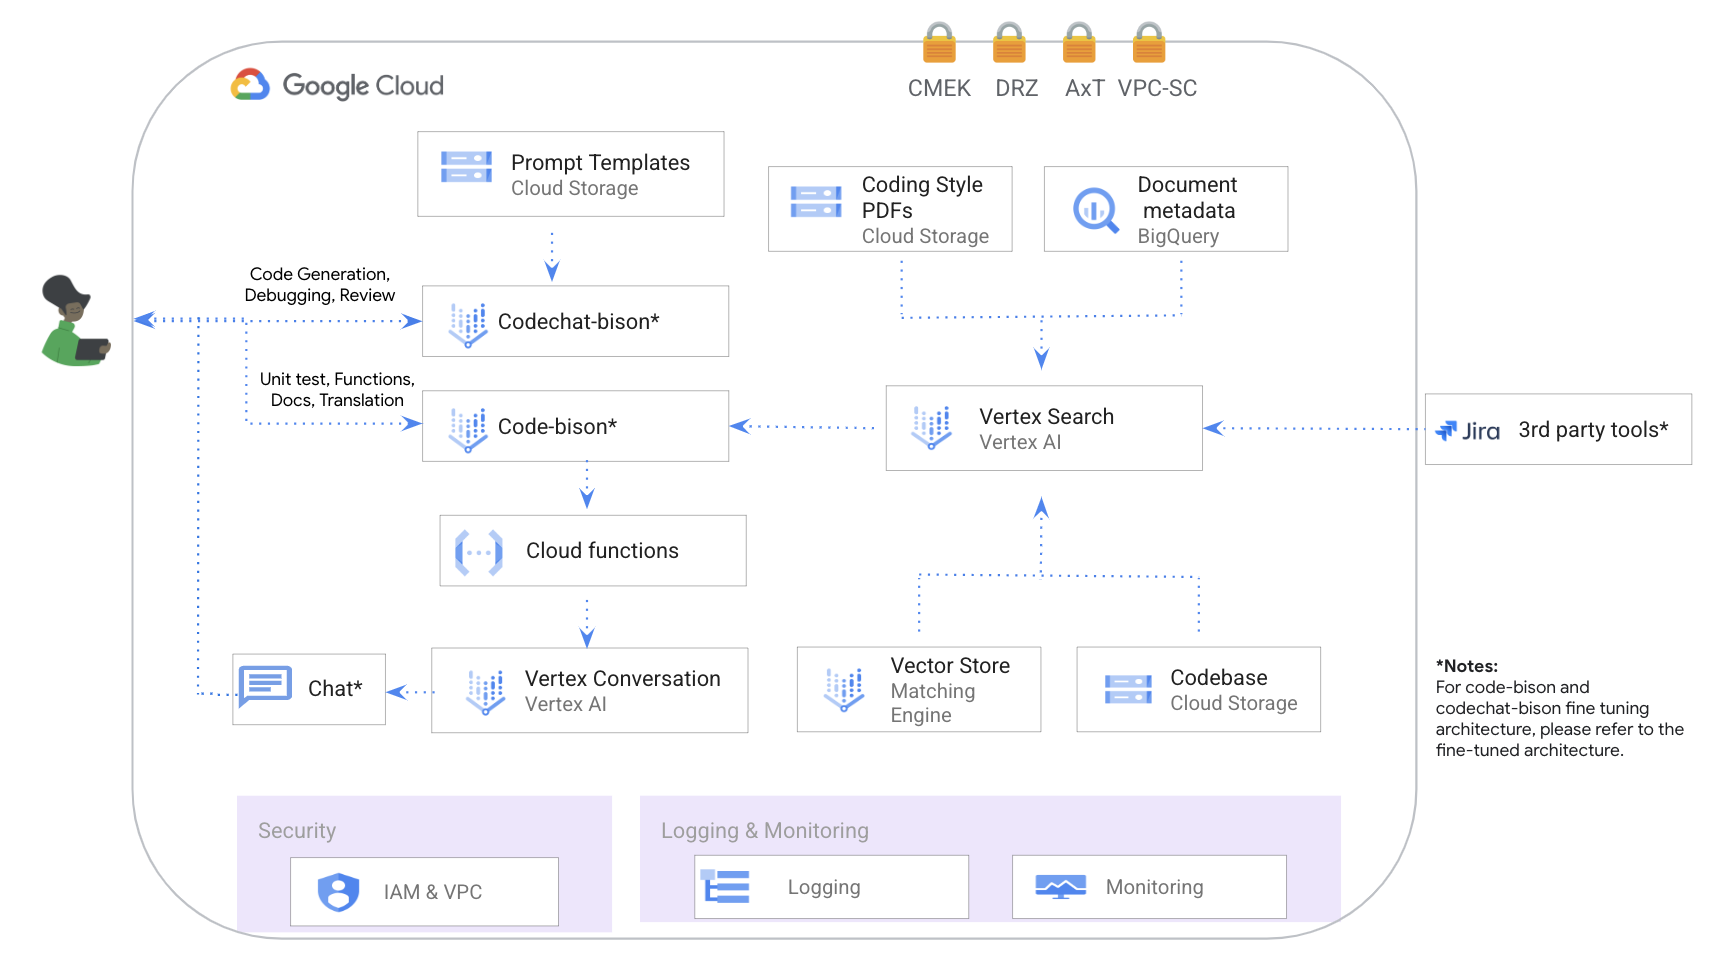


* Author: [leip@](https://moma.corp.google.com/person/leip)
* Date: 11/27/23

## Project Setup
- Here are a few steps you need to run before calling Codey APIs

In [ ]:
# @title Prep Work
import sys
if 'google.colab' in sys.modules:
    ! pip install google-cloud-aiplatform
    ! pip install google-cloud-discoveryengine
    ! pip install jsonlines
    from google.colab import auth as google_auth
    google_auth.authenticate_user()

In [ ]:
import sys
import json
import os
import vertexai
import pandas as pd
from typing import Dict, List, Optional, Tuple
from google.cloud import discoveryengine
from google.protobuf.json_format import MessageToDict

In [ ]:
# @title Initialize Vertex AI
import vertexai
from vertexai.preview.language_models import CodeGenerationModel
from vertexai.preview.language_models import CodeChatModel


VERTEX_API_PROJECT = '<project id>'
VERTEX_API_LOCATION = '<location>'

vertexai.init(project=VERTEX_API_PROJECT, location=VERTEX_API_LOCATION)
code_generation_model = CodeGenerationModel.from_pretrained("code-bison@001")

def send_prompt(prefix, max_token=1024, model = code_generation_model):
    parameters = {
    "temperature": 0.2,
    "max_output_tokens": max_token
    }

    response = model.predict(
    prefix=prefix, **parameters
    )

    return response.text

## Code Generation
- Examples below demonstrate how to use Codey API to do code generation, unit test, refactor, explanation, comment generation, and code generation with fine-tuned model

In [ ]:
# @title Example 1: Generate Code Using Codey Model

prompt = """You are great at designing Object Oriented Programming solutions.
Design a parking lot using object-oriented principles in Java.
Here are the requirements:
[
1) The parking lot has multiple levels. Each level has multiple rows of spots.
2) The parking lot can park motorcycles, cars, and buses.
3) The parking lot has motorcycle spots, compact spots, and large spots.
4) A motorcycle can park in any spot.
5) A car can park in either a single compact spot or a single large spot.
6) A bus can park in five large spots that are consecutive and within the same row. It cannot park in small spots. In the below implementation, we have created an abstract class Vehicle, from which Car, Bus, and Motorcycle inherit. To handle the different parking spot sizes, we have just one class ParkingSpot which has a member variable indicating the size.
]"""
print(send_prompt (prompt))

```java
// Vehicle.java
// Abstract class Vehicle

abstract class Vehicle {
    private String licensePlate;
    private int spotsNeeded;
    private VehicleSize size;

    public Vehicle(String licensePlate, int spotsNeeded, VehicleSize size) {
        this.licensePlate = licensePlate;
        this.spotsNeeded = spotsNeeded;
        this.size = size;
    }

    public String getLicensePlate() {
        return licensePlate;
    }

    public int getSpotsNeeded() {
        return spotsNeeded;
    }

    public VehicleSize getSize() {
        return size;
    }
}

// Car.java
// Concrete class Car

class Car extends Vehicle {
    public Car(String licensePlate) {
        super(licensePlate, 1, VehicleSize.COMPACT);
    }
}

// Bus.java
// Concrete class Bus

class Bus extends Vehicle {
    public Bus(String licensePlate) {
        super(licensePlate, 5, VehicleSize.LARGE);
    }
}

// Motorcycle.java
// Concrete class Motorcycle

class Motorcycle extends Vehicle {
    public Motorcycle(S

In [ ]:
prompt = """
You are an expert in google cloud platform. Generate gcloud CLI to create a GKE cluster with cluster name [hello-cluster]
"""
print(send_prompt (prompt))

```
gcloud container clusters create hello-cluster \
  --num-nodes 3 \
  --machine-type n1-standard-1 \
  --enable-autoscaling \
  --min-nodes 1 \
  --max-nodes 10 \
  --enable-autorepair \
  --enable-autoprovisioning \
  --location us-central1-a

# Reference: https://cloud.google.com/kubernetes-engine/docs/concepts/autopilot-clusters
```


In [ ]:
# @title Example 2- Use Fine-Tuned Model to Generate Vertext AI Search Code
list_models = CodeGenerationModel.from_pretrained("code-bison@001").list_tuned_model_names()
TUNED_MODEL_NAME = list_models[0]
tuned_model = CodeGenerationModel.get_tuned_model(TUNED_MODEL_NAME)
vertexai_search_code = send_prompt(prefix=prompt,model= tuned_model)
vertexai_search_code = vertexai_search_code.removeprefix(' ```python').removesuffix('```')
print(vertexai_search_code)

```python
def search_sample(
    project_id: str,
    location: str,
    search_engine_id: str,
    serving_config_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse.SearchResult]:
    client = discoveryengine.SearchServiceClient()
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=search_engine_id,
        serving_config=serving_config_id,
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
    )
    response = client.search(request)

    return response



In [ ]:
# @title Example 3 - Generate Unit Test
unit_test_prompt = f"""
Generate unit test to cover this block of code {vertexai_search_code}
"""
print(send_prompt (prefix=unit_test_prompt))

```python
import unittest

from google.cloud import discoveryengine
from google.protobuf import json_format


class TestSearchSample(unittest.TestCase):

    def test_search_sample(self):
        project_id = "my-project"
        location = "us-central1"
        search_engine_id = "my-search-engine"
        serving_config_id = "my-serving-config"
        search_query = "hello world"

        results = search_sample(
            project_id=project_id,
            location=location,
            search_engine_id=search_engine_id,
            serving_config_id=serving_config_id,
            search_query=search_query,
        )

        self.assertIsNotNone(results)
        self.assertIsInstance(results, list)
        self.assertGreater(len(results), 0)

        for result in results:
            self.assertIsNotNone(result)
            self.assertIsInstance(result, discoveryengine.SearchResponse.SearchResult)
            self.assertIsNotNone(result.document)
            self.assertIsInstan

In [ ]:
# @title Example 4 - Explain the Code
explain_prompt = f"""
Explain this block of code {vertexai_search_code} line by line
"""
print(send_prompt (prefix=explain_prompt))

The function `search_sample` takes five arguments:

  * `project_id`: The ID of the project that the search engine belongs to.
  * `location`: The location of the search engine.
  * `search_engine_id`: The ID of the search engine.
  * `serving_config_id`: The ID of the serving configuration to use.
  * `search_query`: The search query to use.

The function first creates a client for the Discovery Engine API. It then uses
the client to create a `serving_config` object, which specifies the project,
location, search engine ID, and serving configuration ID.

The function then creates a `SearchRequest` object, which specifies the
`serving_config` and the search query. It then sends the request to the
Discovery Engine API and gets a `SearchResponse` object in return.

The function then iterates over the `results` field of the `SearchResponse`
object and converts each result to a dictionary. It then returns the list of
dictionaries.

Here is a more detailed explanation of each line of code:



In [ ]:
# @title Example 5 - Refactor the Code
refactor_prompt = f"""
Refactor this block of code {vertexai_search_code} by using descriptive and meaningful names and comments
"""
print(send_prompt(prefix=refactor_prompt))

```python
def search_sample(
    project_id: str,
    location: str,
    search_engine_id: str,
    serving_config_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse.SearchResult]:
    """
    Searches for results in the given search engine.

    Args:
        project_id: The ID of the project that owns the search engine.
        location: The location of the search engine.
        search_engine_id: The ID of the search engine.
        serving_config_id: The ID of the serving config to use.
        search_query: The query to search for.

    Returns:
        A list of search results.
    """

    client = discoveryengine.SearchServiceClient()
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=search_engine_id,
        serving_config=serving_config_id,
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
    )
    response = clie

In [ ]:
# @title Example 6 - Generate Comments
comment_prompt = f"""
Generate line-by-line comments for this block of code {vertexai_search_code}
"""
print(send_prompt (prefix=comment_prompt))

This function performs a search using the Discovery Engine API.

The function takes four arguments:

* `project_id`: The ID of the project that the search engine belongs to.
* `location`: The location of the search engine.
* `search_engine_id`: The ID of the search engine.
* `serving_config_id`: The ID of the serving configuration to use for the search.

The function returns a list of `SearchResult` objects, which contain information about the documents that were found in the search.

Here is a more detailed explanation of each line of code:

* `client = discoveryengine.SearchServiceClient()`: This creates a client object for the Discovery Engine API.
* `serving_config = client.serving_config_path(project=project_id, location=location, data_store=search_engine_id, serving_config=serving_config_id)`: This constructs the path to the serving configuration to use for the search.
* `request = discoveryengine.SearchRequest(serving_config=serving_config, query=search_query)`: This creates a `

## Code Debugging

In [ ]:
# @title Step 1: Set up Code Chat Model
VERTEX_API_PROJECT = '<project>'
VERTEX_API_LOCATION = '<location>'

vertexai.init(project=VERTEX_API_PROJECT, location=VERTEX_API_LOCATION)
code_chat_model = CodeChatModel.from_pretrained("codechat-bison")

chat = code_chat_model.start_chat()

def send_message(message, max_token=1024):
    parameters = {
    "temperature": 0,
    "max_output_tokens": max_token
    }
    response = chat.send_message(message, **parameters)
    return response.text

In [ ]:
# @title Step 2: Load Prompt Templates from GCS
prompt_templates = pd.read_csv('gs://<your GCS bucket path>/Debugging-Prompt-Template.csv', sep = ',')

In [ ]:
# @title Step 3: Fix Code Based on Error Message
error_message = """
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-14-8c52ce2d8248> in <cell line: 16>()
     15
     16 for contest in move_data.Contest.unique():
---> 17     data_subset = move_data[move_data.Move_Contest == contest]
     18     plt.scatter(data_subset.Power,
     19                 data_subset.Accuracy, label = contest)

/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py in __getattr__(self, name)
   5900         ):
   5901             return self[name]
-> 5902         return object.__getattribute__(self, name)
   5903
   5904     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'Move_Contest'
"""

context = """
plt.style.use('seaborn-ticks')
pokemon_data = pd.read_csv('gs://<your GCS bucket path>/pokemon-data.csv',
                           sep = ';', converters={'Types':ast.literal_eval, 'Abilities':ast.literal_eval, 'Moves':ast.literal_eval})
move_data = pd.read_csv('gs://<your GCS bucket path>/move-data.csv', index_col = 0)
for var in ['Power', 'Accuracy']:
    move_data[var].replace('None', np.nan, inplace=True)
    move_data[var] = move_data[var].astype(float)

for contest in move_data.Contest.unique():
    data_subset = move_data[move_data.Move_Contest == contest]
    plt.scatter(data_subset.Power,
                data_subset.Accuracy, label = contest)
    plt.xlabel('Power')
    plt.ylabel('Accuracy')
plt.legend(loc = 'lower left', bbox_to_anchor = (1, 0))
plt.show()
"""

In [ ]:
debug_context_prompt = prompt_templates[prompt_templates['Type']=='Debugging with Context']['Prompt Template'][1]
print(debug_context_prompt)

Here is the original code: {context}. Please fix the original code based on the error message below: {error_message} and and explain what you fixed


In [ ]:
response = send_message(debug_context_prompt.format(context=context,error_message=error_message))

#response = send_message(prompt1)
def break_response_to_lines(response):
  response_lines = response.split("\n")
  for line in response_lines:
      print(line)
break_response_to_lines(response)

 The original code has the following error:

```
AttributeError: 'DataFrame' object has no attribute 'Move_Contest'
```

This error is because the `move_data` DataFrame does not have a column named `Move_Contest`. To fix this error, you can add the column to the DataFrame using the following code:

```python
move_data['Move_Contest'] = move_data['Contest'].apply(lambda x: x.split('_')[0])
```

This code uses the `apply()` method to add a new column to the DataFrame. The `lambda` function extracts the first part of the `Contest` column value, which is the contest name.

Once you have added the `Move_Contest` column to the DataFrame, you can then use it to filter the data and create the scatter plot. The following code shows the updated code:

```python
plt.style.use('seaborn-ticks')
pokemon_data = pd.read_csv('gs://demo_test_public_bucket/uj13/pokemon-data.csv',
                           sep = ';', converters={'Types':ast.literal_eval, 'Abilities':ast.literal_eval, 'Moves':ast.literal_

## Code Migration

In [ ]:
# @title Step 1: Load Prompt Templates from GCS
prompt_templates = pd.read_csv('gs://<your GCS bucket path>/Migration-Prompt-Template.csv', sep = ',')

In [ ]:
# @title Step 2: COBOL Migration with Step by Step Instructions

cobol_migration_prompt = prompt_templates[prompt_templates['Type']=='Basic Migration']['Prompt Template'][0]
print(cobol_migration_prompt)

You are great at migrating code from COBOL to Java. Here is the COBOL code: {cobol_file}

Please covert it to Java by following the prompt instructions below to do that:

Step 1: Generate Java classes from COBOL data structures. Each COBOL data structure should correspond to a Java class. Ensure proper data type mapping and encapsulation.

Step 2: Translate COBOL file input/output operations to Java file handling operations

Step 3: Migrate COBOL business logic to Java. Convert COBOL procedures, paragraphs, and sections to Java methods. Ensure equivalent functionality

Step 4: Convert COBOL conditional statements (IF, ELSE, etc.) to Java if-else statements and loops (PERFORM, etc.) to Java loops (for, while, etc.). Ensure logical equivalence

Step 5: Replace COBOL-specific functions and operations with Java equivalents. This includes arithmetic operations, string manipulations, and date/time functions.

Step 6: Generate Java constants from COBOL copybooks. Each COBOL constant should be

In [ ]:
cobol_file = """
IDENTIFICATION DIVISION.
       PROGRAM-ID.  CPSEQFR.
       ENVIRONMENT DIVISION.
       INPUT-OUTPUT SECTION.
       FILE-CONTROL.
           SELECT INFILE ASSIGN  TO 'INFILE1'
                  FILE STATUS IS INPUT-FILE-STATUS.
           SELECT OUTFILE ASSIGN TO 'OUTFILE1'
               FILE STATUS IS OUTPUT-FILE-STATUS.
       DATA DIVISION.
       FILE SECTION.
       FD  INFILE
           LABEL RECORDS ARE STANDARD
           DATA RECORD IS INPUT-RECORD
           RECORD CONTAINS 40 CHARACTERS
           RECORDING MODE IS F
           BLOCK CONTAINS 0 RECORDS.
       01  INPUT-RECORD.
           05 INPUT-FIRST-10      PIC X(10).
           05 INPUT-LAST-30       PIC X(30).

       FD  OUTFILE
           LABEL RECORDS ARE STANDARD
           DATA RECORD IS OUTPUT-RECORD
           RECORD CONTAINS 40 CHARACTERS
           RECORDING MODE IS F
           BLOCK CONTAINS 0 RECORDS.
       01  OUTPUT-RECORD.
           05 OUTPUT-FIRST-30     PIC X(30).
           05 OUTPUT-LAST-10      PIC X(10).

       WORKING-STORAGE SECTION.
       01  WorkAreas.
           05  INPUT-FILE-STATUS  PIC X(02).
               88  GOOD-READ      VALUE '00'.
               88  END-OF-INPUT   VALUE '10'.
           05  OUTPUT-FILE-STATUS PIC X(02).
               88  GOOD-WRITE     VALUE '00'.
           05  RECORD-COUNT       PIC S9(5) COMP-3.

       PROCEDURE DIVISION.
           OPEN INPUT INFILE
           IF NOT GOOD-READ
               DISPLAY 'STATUS ON INFILE OPEN: ' INPUT-FILE-STATUS
               GO TO END-OF-PROGRAM
           END-IF
           OPEN OUTPUT OUTFILE
           IF NOT GOOD-WRITE
               DISPLAY 'STATUS ON OUTFILE OPEN: ' OUTPUT-FILE-STATUS
           END-IF
           PERFORM UNTIL END-OF-INPUT
               READ INFILE
               IF GOOD-READ
                   MOVE INPUT-FIRST-10 TO OUTPUT-LAST-10
                   MOVE INPUT-LAST-30 TO OUTPUT-FIRST-30
                   WRITE OUTPUT-RECORD
                   IF GOOD-WRITE
                        ADD 1 TO RECORD-COUNT
                   ELSE
                       DISPLAY 'STATUS ON OUTFILE WRITE: '
                               OUTPUT-FILE-STATUS
                       GO TO END-OF-PROGRAM
                   END-IF
               END-IF
           END-PERFORM
           .
       END-OF-PROGRAM.
           DISPLAY 'NUMBER OF RECORDS PROCESSED: ' RECORD-COUNT
           CLOSE INFILE
           CLOSE OUTFILE
           GOBACK.

"""

In [ ]:
response = send_message(cobol_migration_prompt.format(cobol_file=cobol_file))

In [ ]:
response_lines = response.split("\n")
for line in response_lines:
    print(line)

 ```java
import java.io.*;

public class CPSEQFR {

    public static void main(String[] args) {

        // Generate Java classes from COBOL data structures
        InputRecord inputRecord = new InputRecord();
        OutputRecord outputRecord = new OutputRecord();

        // Translate COBOL file input/output operations to Java file handling operations
        File infile = new File("INFILE1");
        File outfile = new File("OUTFILE1");

        try {
            // Open input file
            BufferedReader reader = new BufferedReader(new FileReader(infile));

            // Open output file
            BufferedWriter writer = new BufferedWriter(new FileWriter(outfile));

            // Migrate COBOL business logic to Java
            String line;
            while ((line = reader.readLine()) != null) {
                // Convert COBOL conditional statements (IF, ELSE, etc.) to Java if-else statements
                if (line.length() == 40) {
                    // Convert COBOL 

## Codebase Search & Doc Search

In [ ]:
# @title Step 1: Codebase Matching Engine & Langchain Setup
import os
import urllib.request

if not os.path.exists("utils"):
    os.makedirs("utils")

url_prefix = "https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/language/use-cases/document-qa/utils"
files = ["__init__.py", "matching_engine.py", "matching_engine_utils.py"]

for fname in files:
    urllib.request.urlretrieve(f"{url_prefix}/{fname}", filename=f"utils/{fname}")

import json
import textwrap

# Utils
import time
import uuid
from typing import List

import numpy as np
import vertexai

# Vertex AI
from google.cloud import aiplatform

print(f"Vertex AI SDK version: {aiplatform.__version__}")

# LangChain
import langchain

print(f"LangChain version: {langchain.__version__}")

from langchain.chains import RetrievalQA
from langchain.document_loaders import GCSDirectoryLoader
from langchain.embeddings import VertexAIEmbeddings
from langchain.llms import VertexAI
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from pydantic import BaseModel

# Import custom Matching Engine packages
from utils.matching_engine import MatchingEngine
from utils.matching_engine_utils import MatchingEngineUtils

PROJECT_ID = "<project id>"
REGION = "<location>"

# Initialize Vertex AI SDK
vertexai.init(project=PROJECT_ID, location=REGION)

# Utility functions for Embeddings API with rate limiting
def rate_limit(max_per_minute):
    period = 60 / max_per_minute
    print("Waiting")
    while True:
        before = time.time()
        yield
        after = time.time()
        elapsed = after - before
        sleep_time = max(0, period - elapsed)
        if sleep_time > 0:
            print(".", end="")
            time.sleep(sleep_time)


class CustomVertexAIEmbeddings(VertexAIEmbeddings, BaseModel):
    requests_per_minute: int
    num_instances_per_batch: int

    # Overriding embed_documents method
    def embed_documents(self, texts: List[str]):
        limiter = rate_limit(self.requests_per_minute)
        results = []
        docs = list(texts)

        while docs:
            # Working in batches because the API accepts maximum 5
            # documents per request to get embeddings
            head, docs = (
                docs[: self.num_instances_per_batch],
                docs[self.num_instances_per_batch :],
            )
            chunk = self.client.get_embeddings(head)
            results.extend(chunk)
            next(limiter)

        return [r.values for r in results]

# Text model instance integrated with langChain
llm = VertexAI(
    model_name="code-bison",
    max_output_tokens=1024,
    temperature=0.2
)

In [ ]:
# @title Step 2: Codebase Vector Store Setup

# Embeddings API integrated with langChain
EMBEDDING_QPM = 100
EMBEDDING_NUM_BATCH = 5
embeddings = CustomVertexAIEmbeddings(
    requests_per_minute=EMBEDDING_QPM,
    num_instances_per_batch=EMBEDDING_NUM_BATCH,
)
ME_REGION = "us-central1"
ME_INDEX_NAME = f"{PROJECT_ID}-me-index"
ME_EMBEDDING_DIR = f"{PROJECT_ID}-me-bucket"
ME_DIMENSIONS = 768  # when using Vertex PaLM Embedding
mengine = MatchingEngineUtils(PROJECT_ID, ME_REGION, ME_INDEX_NAME)
ME_INDEX_ID, ME_INDEX_ENDPOINT_ID = mengine.get_index_and_endpoint()
print(f"ME_INDEX_ID={ME_INDEX_ID}")
print(f"ME_INDEX_ENDPOINT_ID={ME_INDEX_ENDPOINT_ID}")

# initialize vector store
me = MatchingEngine.from_components(
    project_id=PROJECT_ID,
    region=ME_REGION,
    gcs_bucket_name=f"gs://{ME_EMBEDDING_DIR}".split("/")[2],
    embedding=embeddings,
    index_id=ME_INDEX_ID,
    endpoint_id=ME_INDEX_ENDPOINT_ID,
)

In [ ]:
# @title Step 3: Codebase Search Retriever (Bank of Anthos)
# Create chain to answer questions
NUMBER_OF_RESULTS = 3
SEARCH_DISTANCE_THRESHOLD = 0.6

# Expose index to the retriever
code_retriever = me.as_retriever(
    search_type="similarity",
    search_kwargs={
        "k": NUMBER_OF_RESULTS,
        "search_distance": SEARCH_DISTANCE_THRESHOLD,
    },
)

In [ ]:
# @title Step 4: Doc Search Retriever (Coding Style Guides)
from langchain.retrievers import GoogleCloudEnterpriseSearchRetriever as EnterpriseSearchRetriever

SEARCH_ENGINE_ID = "search engine id"

doc_retriever=EnterpriseSearchRetriever(
    project_id=PROJECT_ID,
    search_engine_id=SEARCH_ENGINE_ID,
    max_documents=3,
)

In [ ]:
# @title Step 5: JIRA Retriever
SEARCH_ENGINE_ID = "search engine id"

jira_retriever=EnterpriseSearchRetriever(
    project_id=PROJECT_ID,
    search_engine_id=SEARCH_ENGINE_ID,
    max_documents=3,
)

In [ ]:
# @title Step 6: Dynamically Select from 3 Retrievers with RouterChain paradigm
from langchain.chains.router import MultiRetrievalQAChain
retriever_infos = [
    {
        "name": "codebase search",
        "description": "Good for answering questions about the code in the codebase",
        "retriever": code_retriever
    },
    {
        "name": "coding style guide",
        "description": "Good for answering questions about coding styles such as python coding styles, java coding styles, c++ coding styles, etc",
        "retriever": doc_retriever
    },
    {
        "name": "jira issues search",
        "description": "Good for answering questions about jira issues",
        "retriever": jira_retriever
    }
]

In [ ]:
from langchain.chains import ConversationChain

DEFAULT_TEMPLATE = """The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:"""

prompt_default_template = DEFAULT_TEMPLATE.replace('input', 'query')

prompt_default = PromptTemplate(
    template=prompt_default_template, input_variables=['history', 'query']
)
default_chain=ConversationChain(llm=llm, prompt=prompt_default, input_key='query', output_key='result')

chain = MultiRetrievalQAChain.from_retrievers(llm, retriever_infos, default_chain=default_chain)

In [ ]:
chain('hi')['result']

/root/.local/lib/python3.10/site-packages/langchain/chains/llm.py:280: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


' Hello. How may I assist you today?\n'

In [ ]:
chain("how does CI/CD pipeline that powers Bank of Anthos work?")['result']

/root/.local/lib/python3.10/site-packages/langchain/chains/llm.py:280: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


Waiting


' The CI/CD pipeline for Bank of Anthos uses Cloud Build and Cloud Deploy, with the help of Terraform, Skaffold, and Kustomize. \n\nThe pipeline includes: \n* Terraform scripts for all Google Cloud resources\n* 3 GKE Autopilot clusters in a fleet\n* 1 Cloud Build trigger for GitHub PRs\n* 6 Cloud Build triggers for staging (1 per service)\n* 2 Cloud SQL databases (1 for staging, 1 for production)\n* 2-stage Cloud Deploy pipelines (staging and production)\n* Anthos Config Management set-up for staging and production\n* Anthos Service Mesh set-up for staging and production\n* Artifact Registry repository for container images\n* Cloud Storage bucket for Terraform state\n* Cloud Storage bucket for ledger monolith artifacts\n* IAM bindings and service accounts\n\nThe pipeline results in:\n* CI per service with Skaffold profile per environment\n* CD per service with Skaffold profile per environment\n\nThe development environment includes:\n* GKE Autopilot (one namespace per deployment)\n* AC

In [ ]:
chain("Tell me more about the best java style according to the java coding style guide.")['result']

/root/.local/lib/python3.10/site-packages/langchain/chains/llm.py:280: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


' The best Java style is the Google Java style. It emphasizes readability and maintainability. You can find more information about it here: https://google.github.io/styleguide/javaguide.html'

In [ ]:
chain("What are the top 2 flink issues in JIRA?")['result']

/root/.local/lib/python3.10/site-packages/langchain/chains/llm.py:280: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


" The top 2 Flink issues in JIRA are:\n1. [FLINK-26173] - Flink's checkpointing mechanism can lead to data loss in certain scenarios\n2. [FLINK-25934] - Flink's resource management can lead to performance degradation in certain scenarios"